
# <center> <font color=bleu>Compte Rendu TP°3</font></center>
### Réaliser par kais baazaoui 3DNI2

## 1/Travail à faire:
## <font color=gray> Exercice 1:</font>

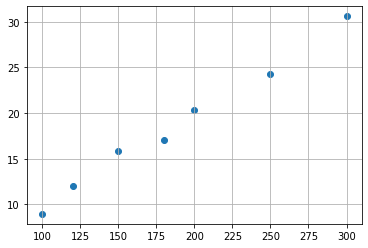

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# load grav.csv
df = pd.read_csv('Datasets/grav.csv')
df.head()

# Select the first column 
X = df.iloc[0:len(df),0]
# Select the second columns
Y = df.iloc[0:len(df),1] 

axes = plt.axes()
# Draw a grid
axes.grid()  

plt.scatter(X,Y) 
plt.show()

slope:  0.10280912511759172
intercept:  -0.6801232361241745


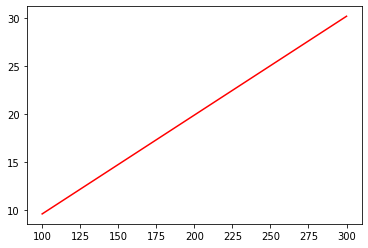

In [2]:
from scipy import stats

# Linregress returns multiple variables - We are interested in slope and intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
def predict(x):
    return slope * x + intercept
# The fitLine variable will be an array of predicted values from the X array
fitLine = predict(X)
plt.plot(X, fitLine, c='r')

# Print 'slope'
print ("slope: ",slope)

# Print 'intercept'
print ("intercept: ",intercept)

In [3]:
## <font color=gray> Exercice 2:</font>

In [4]:
!pip install pyreadstat

In [5]:
import pyreadstat

# load test_score.sav
df, metadata = pyreadstat.read_sav("Datasets/test_scores.sav")
df.head(10)

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,1.0,2.0,6OL,0.0,20.0,2FHT3,1.0,2.0,62.0,72.0
1,ANKYI,1.0,2.0,6OL,0.0,20.0,3JIVH,1.0,2.0,66.0,79.0
2,ANKYI,1.0,2.0,6OL,0.0,20.0,3XOWE,0.0,2.0,64.0,76.0
3,ANKYI,1.0,2.0,6OL,0.0,20.0,556O0,1.0,2.0,61.0,77.0
4,ANKYI,1.0,2.0,6OL,0.0,20.0,74LOE,0.0,2.0,64.0,76.0
5,ANKYI,1.0,2.0,6OL,0.0,20.0,7YZO8,1.0,2.0,66.0,74.0
6,ANKYI,1.0,2.0,6OL,0.0,20.0,9KMZD,0.0,2.0,63.0,75.0
7,ANKYI,1.0,2.0,6OL,0.0,20.0,9USQK,1.0,2.0,63.0,72.0
8,ANKYI,1.0,2.0,6OL,0.0,20.0,CS5QP,0.0,2.0,64.0,77.0
9,ANKYI,1.0,2.0,6OL,0.0,20.0,D6HT8,1.0,2.0,61.0,72.0


In [6]:
# Shape the dataset
df.shape
# Info of dataset
df.info()
# Describe dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   float64
 2   school_type      2133 non-null   float64
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   float64
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   float64
 8   lunch            2133 non-null   float64
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(8), object(3)
memory usage: 183.4+ KB


,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
count,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000
mean,1.814346,1.258322,0.356306,22.796531,0.495077,1.569620,54.955931,67.102203
std,0.793525,0.437814,0.479019,4.228893,0.500093,0.495245,13.563101,13.986789
min,1.000000,1.000000,0.000000,14.000000,0.000000,1.000000,22.000000,32.000000
25%,1.000000,1.000000,0.000000,20.000000,0.000000,1.000000,44.000000,56.000000
50%,2.000000,1.000000,0.000000,22.000000,0.000000,2.000000,56.000000,68.000000
75%,2.000000,2.000000,1.000000,27.000000,1.000000,2.000000,65.000000,77.000000
max,3.000000,2.000000,1.000000,31.000000,1.000000,2.000000,93.000000,100.000000


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


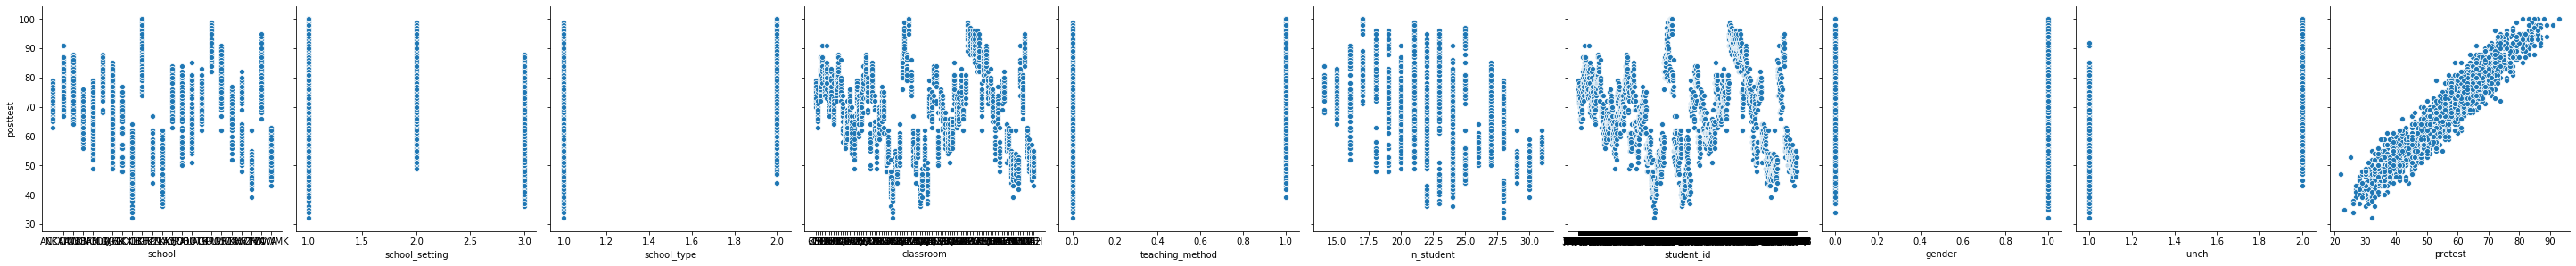

In [7]:
# Using pairplot to isualize the data for correlation
sns.pairplot(df, x_vars=['school','school_setting','school_type','classroom','teaching_method','n_student','student_id','gender', 'lunch','pretest'], 
             y_vars='posttest', size=4, aspect=1, kind='scatter')
plt.show()

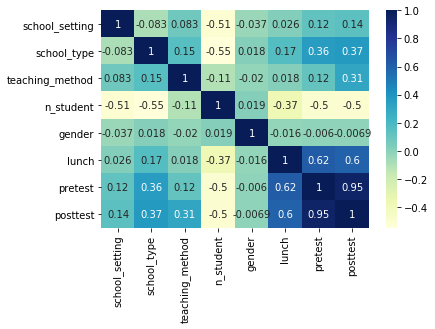

In [8]:
# using heatmap to visualate the data
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

Text(0, 0.5, 'posttest')

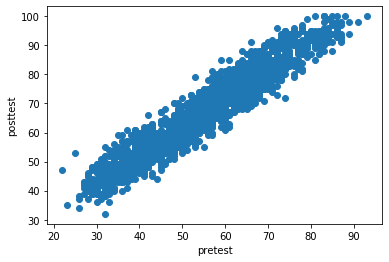

In [9]:
X = df['pretest']
y = df['posttest']
plt.scatter(X,y)
plt.xlabel("pretest")
plt.ylabel("posttest")

In [10]:
# Spletting training and testing variable
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6, 
                                                    test_size = 0.3, random_state = 100)

X_train
y_train



1455    81.0
299     67.0
1912    49.0
863     92.0
298     64.0
        ... 
994     61.0
1333    58.0
1094    41.0
528     75.0
465     81.0
Name: posttest, Length: 1279, dtype: float64

In [11]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

# Fitting the resgression line
lr = sm.OLS(y_train, X_train_sm).fit()

print("params:")
lr.params
print("summary:")
lr.summary()

params:
summary:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               posttest   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 1.243e+04
Date:                Wed, 09 Dec 2020   Prob (F-statistic):               0.00
Time:                        23:33:34   Log-Likelihood:                -3663.9
No. Observations:                1279   AIC:                             7332.
Df Residuals:                    1277   BIC:                             7342.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.2260      0.501     26.382      0.000      12.242      14.209
pretest        0.9825      0.009    111.500      0.000       0.965       1.000
==============================================================================
Omnibus:                       19.176   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.648
Skew:                           0.138   Prob(JB):                      0.00109
Kurtosis:                       2.575   Cond. No.                         240.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

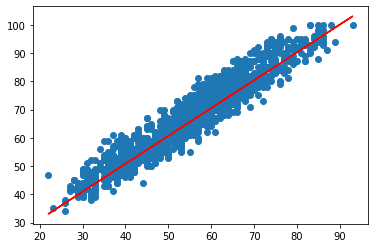

In [12]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 11.3750 + 0.9853*X_train, 'r')
plt.show()

# Predicting y_train_pred using traingn data of X
y_train_pred = lr.predict(X_train_sm)
# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)
# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)
# Printing the first 15 predicted values
y_test_pred

In [13]:
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
print("r_squared: ",r_squared)

# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

NameError: name 'y_test_pred' is not defined

In [ ]:
# Splitting to train and test variable
from sklearn.model_selection import train_test_split

X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, 
                                                                test_size = 0.3, random_state = 100)

# Shape of the train set without adding column
X_train_lm.shape
# Adding additional column to the train and test data
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)
print(X_train_lm.shape)
print(X_test_lm.shape)

In [ ]:
from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
lm = LinearRegression()
# Fit the model using .fit() method
lm.fit(X_train_lm, y_train_lm)

In [ ]:
#Intercept value
print("Intercept :",lm.intercept_)
# Slope value
print('Slope :',lm.coef_)

# Making Predictions of y_value
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)
# Comparing the r2 value of both train and test data
print("y_train,y_train_pred score:",r2_score(y_train,y_train_pred))
print("y_test,y_test_pred score:",r2_score(y_test,y_test_pred))

## <font color=gray> Exercice 3:</font>

Import the data and specify the variable types with the Type node

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline



In [ ]:
from sklearn.datasets import load_boston
bh_data = load_boston()
boston_dataset = load_boston()

#print the value of the boston_dataset to see her contains. 
print(bh_data.keys()) 


In [ ]:
boston = pd.DataFrame(bh_data.data, columns=boston_dataset.feature_names)
boston.head()

Add a Regression node to the stream and select MEDV as the target variable and all other variables as the
input.

In [ ]:
boston['MEDV'] = bh_data.target
boston

#### <font color=black> Data preprocessing: </font>

In [ ]:
#See and count the number of missing values for each feature.
boston.isnull().sum()

#### <font color=black> Exploratory Data Analysis: </font>
understand the relationship of the target variable with other features.

In [ ]:
#understand the relationship of the target variable with other features by plotin 
#the distribution of the target variable MEDV
sns.set(rc={'figure.figsize':(10.5,8.67)})
sns.distplot(boston['MEDV'], bins=26)
plt.show()

=>The values of MEDV are distributed normally with few outliers

Choose the Backwards method to find the significant input variables and then run the stream

In [15]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

NameError: name 'boston' is not defined

<AxesSubplot:>

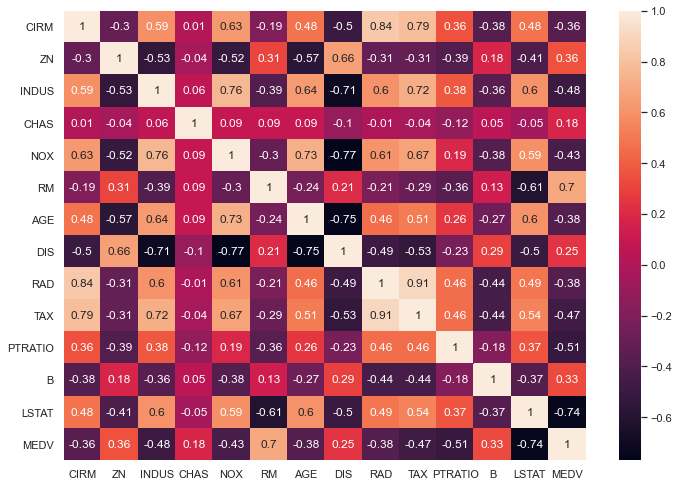

In [36]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

Inspect the model nugget and identify the estimated coefficients and the regression equation. Which variables are included in the final model, and which variable has a coefficient of 3.832?

In [4]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    p

NameError: name 'plt' is not defined

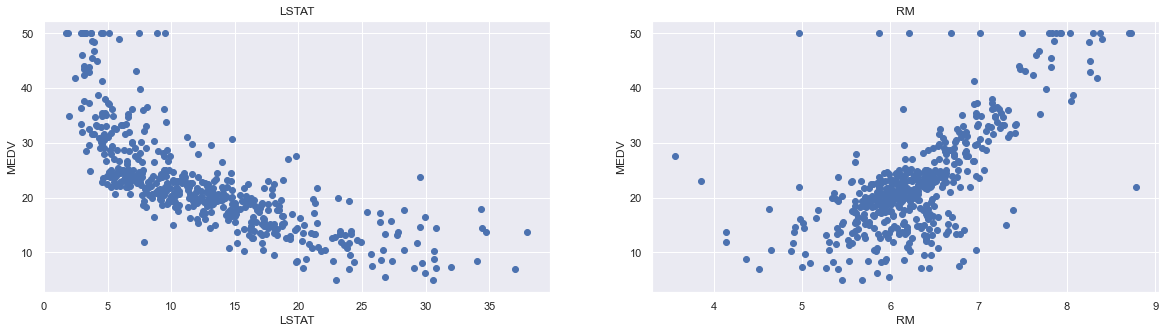

In [37]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

=>The prices increase immediattely with the value of RM. 

=>The data seems to be capped at 50.

=>The prices decrease with an increase in LSTAT.

=>Not looking to be following exactly a linear line.

In [5]:
# Preparing the data for training the model
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

#Splitting the data into training and testing sets 
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

NameError: name 'pd' is not defined

We split the data into training and testing sets. We train the model with 80% of the samples and test with the remaining 20% to assess the model’s performance on unseen data. 
We use train_test_split function provided by scikit-learn library

In [2]:
pip install watermark

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Training and testing the model
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,numpy,watermark 

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.7.6
IPython version      : 7.12.0

pandas   : 1.0.1
numpy    : 1.18.1
watermark: 2.1.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 9, GenuineIntel
CPU cores   : 4
Architecture: 64bit

 
Last updated: Wed Dec 09 2020 23:36:06Paris, Madrid



=>We use scikit-learn’s LinearRegression to train the model on both the training and test sets.